# NumPy 배열

많은 숫자 데이터를 하나의 변수에 넣고 관리 할 때 리스트는 속도가 느리고 메모리를 많이 차지하는 단점이 있다. **배열(array)** 을 사용하면 적은 메모리로 데이터를 빠르게 처리할 수 있다. 배열은 리스트와 비슷하지만 다음과 같은 점에서 다르다.

1. 모든 원소가 같은 자료형이어야 한다.
2. 원소의 갯수를 바꿀 수 없다.

파이썬은 자체적으로 배열 자료형을 제공하지 않는다. 따라서 배열을 구현한 다른 패키지를 임포트해야 한다. 파이썬에서 배열을 사용하기 위한 표준 패키지는 **넘파이(NumPy)** 이다.

NumPy는 **수치해석용 파이썬 패키지**이다. **다차원의 배열 자료구조** 클래스인 ndarray 클래스를 지원하며 벡터와 행렬을 사용하는 선형대수 계산에 주로 사용된다. 

NumPy의 배열 연산은 C로 구현된 내부 반복문을 사용하기 때문에 파이썬 반복문에 비해 속도가 빠르며 **벡터화 연산(vectorized operation)** 을 이용하여 간단한 코드로도 복잡한 선형 대수 연산을 수행할 수 있다. 또한 **배열 인덱싱(array indexing)** 을 사용한 질의(Query) 기능을 이용하여 간단한 코드로도 복잡한 수식을 계산할 수 있다.

## NumPy 패키지 임포트

배열을 사용하기 위해서는 우선 다음과 같이 NumPy 패키지를 임포트한다. NumPy는 np라는 이름으로 임포트하는 것이 관례이다.

In [ ]:
import numpy as np

## 1차원 배열 만들기

NumPy의 `array`라는 함수에 리스트를 넣으면 배열로 변환해 준다. 따라서 1 차원 배열을 만드는 방법은 다음과 같다.

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ar = np.array(a)
ar

리스트와 비슷해 보이지만 `type` 명령으로 자료형을 살펴보면 ndarray임을 알 수 있다.

In [ ]:
print(type(ar))
type(ar)

만들어진 `ndarray` 객체의 표현식(representation)을 보면 바깥쪽에 array()란 것이 붙어 있을 뿐 리스트와 동일한 구조처럼 보인다. 그러나 배열 객체와 리스트 객체는 많은 차이가 있다. 

우선 리스트 클래스 객체는 각각의 원소가 다른 자료형이 될 수 있다. 그러나 배열 객체 객체는 C언어의 배열처럼 연속적인 메모리 배치를 가지기 때문에 모든 원소가 같은 자료형이어야 한다. 이러한 제약사항이 있는 대신 원소에 대한 접근과 반복문 실행이 빨라진다.

## 벡터화 연산

배열 객체는 배열의 각 원소에 대한 반복 연산을 하나의 명령어로 처리하는 **벡터화  연산(vectorized operation)** 을 지원한다. 예를 들어 다음처럼 여러개의 데이터를 모두 2배 해야 하는 경우를 생각하자. 

In [ ]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for 반복문을 사용하면 다음과 같이 구현할 수 있다.

In [ ]:
answer = []
for di in data:
    answer.append(2 * di)
answer

하지만 벡터화 연산을 사용하면 다음과 같이 for 반복문이 없이 한번의 연산으로 할 수 있다. 계산 속도도 반복문을 사용할 때 보다 훨씬 빠르다.

In [ ]:
x = np.array(data)
x

참고로 일반적인 **리스트 객체**에 **정수를 곱**하면 객체의 크기가 정수배 만큼으로 증가한다.

In [ ]:
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(2 * L)     

벡터화 연산결과

In [ ]:
2 * x 

벡터화 연산은 비교 연산과 논리 연산을 포함한 모든 종류의 수학 연산에 대해 적용된다. 선형 대수에 적용되는 벡터화 연산에 대해서는 나중에 보다 자세히 설명한다.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])

In [ ]:
2 * a + b

In [ ]:
a == 2

In [ ]:
b > 10

In [ ]:
(a == 2) & (b > 10)   # a == 2 and b > 10

## 2차원 배열 만들기

`ndarray` 는 **N-dimensional Array의** 약자이다. 이름 그대로 1차원 배열 이외에도 2차원 배열, 3차원 배열 등의 다차원 배열 자료 구조를 지원한다. 
2차원 배열은 **행렬(matrix)** 이라고 하는데 행렬에서는 가로줄을 **행(row)** 이라고 하고 세로줄을 **열(column)** 이라고 부른다.

다음과 같이 **리스트의 리스트(list of list)** 를 이용하면 **2차원 배열** 을 생성할 수 있다. 안쪽 리스트의 길이는 행렬의 열의 수 즉, 가로 크기가 되고 바깥쪽 리스트의 길이는 행렬의 행의 수, 즉 세로 크기가 된다. 예를 들어 2 x 3 배열은 다음과 같이 만든다.

In [ ]:
c = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
c

In [ ]:
c.shape 

In [ ]:
c.ndim  # 차원

In [ ]:
c[0, 1]

2차원 배열의 행과 열의 갯수는 다음처럼 구한다.

In [ ]:
# 행의 갯수
len(c)

In [ ]:
# 열의 갯수
len(c[0])

#### 연습 문제 4.1.1

NumPy를 사용하여 다음과 같은 행렬을 만든다.

```
10 20 30 40
50 60 70 80
```

In [ ]:
n = np.array([[10, 20, 30, 40],
             [50, 60, 70, 80]])

---
## 3차원 배열 만들기

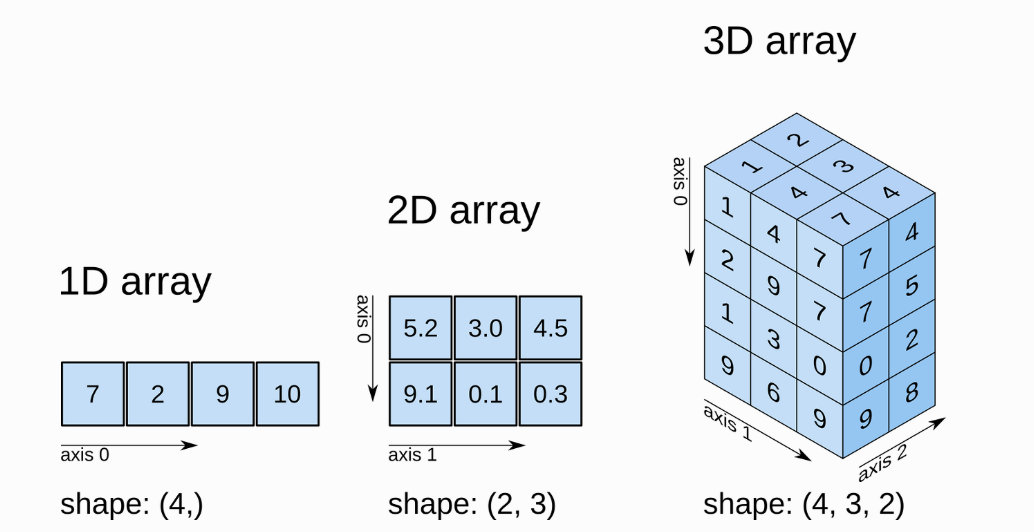
### * numpy에서는 ndim = (2 ,3, 4)

리스트의 리스트의 리스트를 이용하면 3차원 배열도 생성할 수 있다. 크기를 나타낼 때는 가장 **바깥쪽 리스트의 길이부터 가장 안쪽 리스트 길이의 순서로** 표시한다. 예를 들어 2 x 3 x 4 배열은 다음과 같이 만든다.

In [ ]:
x1 = np.array([7, 2, 9, 10])
x1.shape

In [ ]:
x2 = np.array([[5.2, 3.0, 4.5],
               [9.1, 0.1, 0.3]])
x2.shape

In [ ]:
d = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              
              [[11, 12, 13, 14],
               [15, 16, 17, 18],
               [19, 20, 21, 22]]])   # 2 x 3 x 4 array

In [ ]:
d.shape

In [ ]:
len(d), len(d[0]), len(d[0, 0])

In [ ]:
d.ndim

In [ ]:
d1 = [[1, 2, 3, 4],
      [5, 6, 7, 8],
      [9, 10, 11, 12]]

d2 = [[11, 12, 13, 14],
      [15, 16, 17, 18],
      [19, 20, 21, 22]]

d3 = np.array([d1, d2])
d3

In [ ]:
type(d3)

In [ ]:
d3.ndim, d3.shape

3차원 배열의 행, 열, 깊이는 다음과 같이 구할 수 있다.

In [ ]:
len(d), len(d[0]), len(d[0][0])

## 배열의 차원과 크기 알아내기

배열의 차원 및 크기를 구하는 더 간단한 방법은 배열의 `ndim` 속성과 `shape` 속성을 이용하는 것이다. `ndim` 속성은 배열의 차원, `shape` 속성은 배열의 크기를 반환한다.

In [ ]:
# a = np.array([1, 2, 3])
print(a.ndim)
print(a.shape)

In [ ]:
a1 = np.array([1, 2, 3])   # vector
a2 = np.array([[1, 2, 3]]) # 행렬...
a3 = np.array([[1],
              [2],
              [3]])
a1.ndim, a2.ndim, a3.ndim

In [ ]:
a1.shape, a2.shape, a3.shape

In [ ]:
# c = np.array([[0, 1, 2], [3, 4, 5]])
print(c.ndim)
print(c.shape)

In [ ]:
d = np.array([[[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]],
              [[11, 12, 13, 14],
               [15, 16, 17, 18],
               [19, 20, 21, 22]]])   # 2 x 3 x 4 arrayprint(d.ndim)
print(d.shape)

## 배열의 인덱싱

일차원 배열의 인덱싱은 리스트의 인덱싱과 같다. 

In [ ]:
a = np.array([0, 1, 2, 3, 4])

In [ ]:
a[2]

In [ ]:
a[-1]

다차원 배열일 때는 다음과 같이 콤마(comma ,)를 사용하여 접근할 수 있다. 콤마로 구분된 차원을 **축(axis)** 이라고도 한다. 그래프의 x축과 y축을 떠올리면 될 것이다.

In [ ]:
a = np.array([[0, 1, 2], [3, 4, 5]])
a

In [ ]:
a[0, 0]  # 첫번째 행의 첫번째 열

In [ ]:
a[0, 1]  # 첫번째 행의 두번째 열

In [ ]:
a[-1]

In [ ]:
a[-1, -1]  # 마지막 행의 마지막 열

## 배열 슬라이싱

배열 객체로 구현한 다차원 배열의 원소 중 복수 개를 접근하려면 일반적인 파이썬 슬라이싱(slicing)과 comma(,)를 함께 사용하면 된다.

In [ ]:
a = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
a

In [ ]:
a[0, :]  # 첫번째 행 전체

In [ ]:
a[:, 1]  # 두번째 열 전체

In [ ]:
a[1, 1:]  # 두번째 행의 두번째 열부터 끝열까지

In [ ]:
a[:2, :2]

### 연습 문제 4.1.2

다음 행렬과 같은 행렬이 있다.

```python
    m = np.array([[ 0,  1,  2,  3,  4],
                  [ 5,  6,  7,  8,  9],
                  [10, 11, 12, 13, 14]])
```

1. 이 행렬에서 값 7 을 인덱싱한다.

In [ ]:
m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])
m[1, 2]

2. 이 행렬에서 값 14 를 인덱싱한다.

In [ ]:
m[-1, -1]

3. 이 행렬에서배열 [6, 7]을 슬라이싱한다.

In [ ]:
m[1, 1:3]

4. 이 행렬에서 배열 [[3, 4], [8, 9]] 을 슬라이싱한다.

In [ ]:
m[:2, -2:]

## 배열 인덱싱

NumPy 배열 객체의 또다른 강력한 기능은 **팬시 인덱싱(fancy indexing)** 이라고도 부르는 **배열 인덱싱(array indexing)** 방법이다. 인덱싱이라는 이름이 붙었지만 사실은 **데이터베이스의 질의(Query) 기능**을 수행한다. 배열 인덱싱에서는 대괄호(Bracket, [])안의 인덱스 정보로 숫자나 슬라이스가 아니라 **위치 정보를 나타내는 또 다른 `ndarray` 배열**을 받을 수 있다. 여기에서는 이 배열을 편의상 **인덱스 배열**이라고 부르겠다. 배열 인덱싱의 방식에은 **불리안(Boolean) 배열 방식과 정수 배열 방식** 두가지가 있다.

먼저 **불리안 배열 인덱싱 방식**은 인덱스 배열의 원소가 **True, False 두 값으로만 구성**되며 인덱스 배열의 크기가 원래 ndarray 객체의 크기와 같아야 한다.

예를 들어 다음과 같은 1차원 `ndarray`에서 짝수인 원소만 골라내려면 짝수인 원소에 대응하는 인덱스 값이 True이고 홀수인 원소에 대응하는 인덱스 값이 False인 인덱스 배열을 넣으면 된다.

In [ ]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
idx = np.array([True, False, True, False, True,
                False, True, False, True, False])
a[idx], a.dtype

In [ ]:
np.array([0, 1, 2])[np.array([True, False, True])]

---
**조건문 연산**을 사용하면 다음과 같이 간단히 쓸 수 있다.

In [ ]:
a % 2

In [ ]:
a % 2 == 0

In [ ]:
a[a % 2 == 0]

**정수 배열 인덱싱**에서는 인덱스 배열의 원소 각각이 원래 `ndarray` 객체 원소 하나를 가리키는 인덱스 정수이여야 한다.
예를 들어 **_1차원 배열에서 홀수번째 원소만 골라내는 것_**은 다음과 같다

In [ ]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([0, 2, 4, 6, 8])
a[idx]

이 때는 배열 인덱스의 크기가 **원래의 배열 크기와 달라도 상관없다**. 같은 원소를 반복해서 가리키는 경우에는 배열 인덱스가 원래의 배열보다 더 커지기도 한다.

In [ ]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
idx = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2])
a[idx]

In [ ]:
a[0, 1, 1]     # Error!

In [ ]:
a[[0, 1, 1]]

배열 인덱싱은 **다차원 배열**의 각 차원에 대해서도 할 수 있다.

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

In [ ]:
a[:, [True, False, False, True]]

In [ ]:
a[[2, 0, 1], :]    # 행의 순서 바꾸기

In [ ]:
a[[2, 0, 1]]

### 연습 문제 4.1.3

다음 행렬과 같은 배열이 있다.

```python
    x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                  11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
```

1. 이 배열에서 3의 배수를 찾아라.
2. 이 배열에서 4로 나누면 1이 남는 수를 찾아라.
3. 이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾아라.

1. 이 배열에서 3의 배수를 찾아라.

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

x[x % 3 == 0]

2. 이 배열에서 4로 나누면 1이 남는 수를 찾아라.

In [ ]:
x[x % 4 == 1]

3. 이 배열에서 3으로 나누면 나누어지고 4로 나누면 1이 남는 수를 찾아라.

In [ ]:
x[(x % 3 == 0) & (x % 4 == 1)]